# Energy Balance Model (numerical exploration, designed to accompany Math 100 assignment)

The code below imports and creates the functions you need for this assignment. Run the code block below before continuing to the assignment, but do not edit it.

In [29]:
# DO NOT EDIT

# Imports

import matplotlib
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
matplotlib.rcParams.update({'font.size': 15})

# Albedo Functions

def albedo1(T):
  if T <= 247:
    return 0.7
  elif T >= 282:
    return 0.3
  else:
    #return -2/175*T+(1233)/350
    return 3.52296 - 0.011429*T

def albedo2(T):
  return 0.5-0.2 * math.tanh((T-265)/10)

def albedo3(T):
  if T <= 264:
    return 0.7
  else:
    return 0.3

# Constants

C=1e23
r=6.3781e6
Q=1365
sigma=5.6704e-8
epsilon=0.600

# Initial Conditions

T0 = 232.112

# Differential Equation (Energy Balance Model)

def dTdt(t,T):
  Ein = np.pi*r**2.0*Q*(1-albedo(T))
  Eout = 4.0*np.pi*r**2*sigma*epsilon*T**4
  return [Ein/C - Eout/C]

# Solving the Equation

def solveAndGraph():
  xs = np.linspace(220,320,100)
  ys = np.vectorize(albedo)(xs)
  plt.plot(xs,ys)
  plt.title(r"Albedo $\alpha(T)$")
  plt.xlabel("Temperature (K)")
  plt.ylabel("Albedo (unitless)")
  plt.grid()
  plt.show()

  sol = integrate.solve_ivp(dTdt, [0.0,3.156e9], [T0], t_eval=np.linspace(0,3.156e9,100))
  plt.plot(sol.t/3.154e7,sol.y[0])
  plt.title(r"Temperature vs. Time")
  plt.xlabel("Time (years)")
  plt.grid(which='major', linestyle='-')
  plt.grid(which='minor', linestyle='-', alpha=0.2)
  plt.minorticks_on()
  plt.xlim(0,10)
  plt.ylabel("Temperature (Kelvin)")
  plt.ticklabel_format(useOffset=False)
  plt.show()

### Background

Instructor note: If used in tandem with the EMB Math 100 problem set, the background information below may be redundant.

The EBM (Energy Balance Model) is an important model in climate research. It suggests that the rate of change in the Earth's temperature is proportional to the difference in the incoming and outgoing rates of energy transfer due to thermal radiation. Consider the following variable definitions.
    


|Symbol | Definition | Units |
| ---| :--- | ---| 
|$C$ | Heat capacity of the Earth | $J K^{-1}$|  
|$T > 0$ | Temperature of the Earth (in Kelvin) | $K$ |
|$t>0$ | Time | $s$ |


The EBM has the following form:


$$C \frac{d T}{d t} = \underbrace{\pi r^2 Q (1-\alpha(T))}_\text{$P_{\rm in}$} - \underbrace{4 \pi r^2 \sigma \epsilon T^4}_\text{$P_{\rm out}$}. $$


The total rate of change of the energy of the Earth is given by $C\frac{dT}{dt}$, the rate of incoming energy being absorbed by the Earth is given by $P_{\rm in}$ and the energy being radiated out of the Earth is given by $P_{\rm out}$. The variables involved in $P_{\rm in}$ are: $Q$, which represents the rate of incoming solar energy reaching the Earth per square meter; $r$, which is the radius of the Earth; and $\alpha \in [0,1]$, which is the Earth's albedo, or the proportion of light reaching the Earth's surface that gets reflected away, which is a function of temperature. The cross sectional area of the Earth that is exposed to solar radiation is $\pi r^2$.


The additional variables involved in $P_{\rm out}$ are: $\sigma$, which is the Stefan-Boltzmann constant and $\epsilon$ which is the proportion of the Earth's theoretical maximum energy output that is actually radiated away from the surface and into space. In other words, $1-\epsilon$ is the fraction of outgoing radiation that is re-emitted back down to Earth due to greenhouse gases in the atmosphere. The surface area of the Earth (which is radiating the energy) is $4\pi r^2$.




Estimates for the above parameters are
$$
\begin{cases}
    C & = 1.0 \times 10^{23} J K^{-1} \\
    r & = 6.3781 \times 10^{6}m \\
    Q & = 1365 J s^{-1} m^{-2} \\
    \sigma &= 5.6704 \times 10^{-8} J s^{-1} m^{-2} K^{-4}.
\end{cases}
$$

In the EBM model the albedo, $\alpha(T)$,  which is the proportion of light reaching the Earth's surface that gets reflected away,
is a function of temperature. When the Earth's is colder it is covered in more snow and ice, which reflect more light, so albedo is a decreasing function of temperature.

There are three different functions that are commonly used to model the albedo, $\alpha (T)$ and in this assignment we will explore the effect that the different functions have on the temperature of the earth as a function of time, $T(t)$ (the solution to the differential equation above):

- The first function for albedo is a piecewise function (as utilized in the EBM assignment). Below this function will be referred to as `albedo1`
- The second function for albedo is a hypertangent function, which is a smoothed out approximation of the first expression. Below this function will be referred to as `albedo2`
- The third function for albedo is a discontinuous piecewise function with a single jump discontinuity. Below this function will be referred to as `albedo3`


### Code

The code below plots the solution to the EBM (the differential equation above) for a given albedo function (`albedo1`, `albedo2`, or `albedo3`) and a given initial condition, $T_0$. You can alter the albedo function and the initial condition to understand the effect that both have on the temperature of the earth as a function of time, $T(t)$.

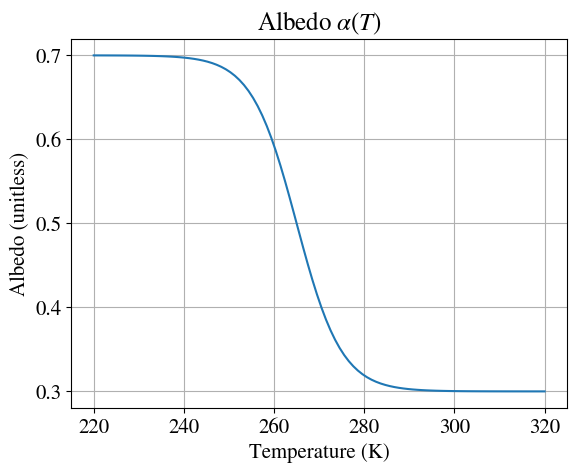

/tmp/ipykernel_691/3697474377.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 0.5-0.2 * math.tanh((T-265)/10)


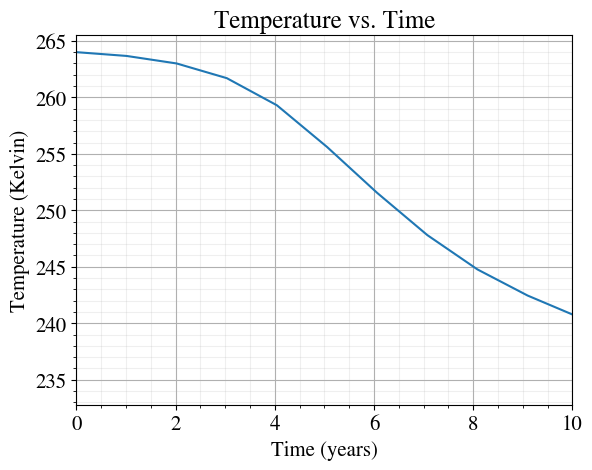

In [2]:
# EDIT BELOW

# Choose which albedo function to use
albedo = albedo2 #albedo1/albedo2/albedo3

# Choose an initial condition
T0 = 264 # [200,300]

# View a solution
solveAndGraph()

### Questions
1. Run the simulation using the three different albedo functions. Consider the top graph, which is a graph of each albedo function.

  a. For the function `albedo1`, specify which points (if any) are discontinouous. Additionally, specify which points (if any) are non-differentiable.

  b. Do the same for the function `albedo2`.

  c. Do the same for the function `albedo3`.

2. Now consider the bottom graph, which is the result of the numerical simulation utilizing each albedo function. Run the similation for three different initial conditions: $T_0=239$, $T_0=267$, and $T_0=300$. Compare the plots of the Earth's temperature over time, $T(t)$, when the three different albedo functions (`albedo1`, `albedo2`, and `albedo3`) are used to determine $T(t)$ at each of the different initial conditions. Which initial condition results in the largest qualitative difference in $T(t)$ (Earth's temperature) between the different albedo functions? Why? 

3. a. For this question, use the first albedo function (`albedo1`). If there is a uniform probability that the initial temperature, $T_0$, lies anywhere on the interval $[200,300]$, determine the probability that $\lim_{t \to \infty}T(t) \geq 250$. Hint: run the simulation above for all integer values of $T_0 \in [260,265]$ and look at what happens to the graph of $T(t)$.
  
  b. How does your answer change if you use the second albedo function (`albedo2`) instead? 